In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test-file', 'train3']


**Exploratory Data analysis**

**Import Packages**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# get data frame from files
def get_dataframe(filePath):
    file_path_list = filePath.split(".")
    file_extension = file_path_list[-1]
    if file_extension == 'csv':
        df = pd.read_csv(filePath)
        return df
    else:
        return pd.DataFrame()

In [5]:
# Load training and test data frame
train_df = get_dataframe('../input/train3/train.csv')
test_df = get_dataframe('../input/test-file/test.csv')

**Basic Structure of data**

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


**The above information of train data set shows that the some columns having null value**

In [7]:
# Information about test data set 
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**There are some columns in test data set also having the null value**

In [8]:
test_df['Loan_Status'] = 'NA' # Add the loan status column in test data set

In [9]:
# Concate the traing and test data set because train and test data set having null value of columns
final_df = pd.concat((train_df,test_df))

In [10]:
# Get information about the final data frame
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [11]:
print('Shape of final data = {}'.format(train_df.shape))

Shape of final data = (614, 13)


**Observation: - There are 614 data points and each data points has 13 feature vectors**

In [12]:
# print top 10 data points
final_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [13]:
# print last 10 data points
final_df.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
357,LP002952,Male,No,0,Graduate,No,2500,0.0,60.0,360.0,1.0,Urban,NA
358,LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,NA
359,LP002962,Male,No,0,Graduate,No,4000,2667.0,152.0,360.0,1.0,Semiurban,NA
360,LP002965,Female,Yes,0,Graduate,No,8550,4255.0,96.0,360.0,NaN,Urban,NA
361,LP002969,Male,Yes,1,Graduate,No,2269,2167.0,99.0,360.0,1.0,Semiurban,NA
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NA
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NA
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NA
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NA
366,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NA


In [14]:
# NUmber of Features in data set
final_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
# Check the null value in columns
final_df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

**In Final Data set (Training and test data set) columns Gender, Married, Dependents, Self_employed,LoanAmount,Loan_Amount_Term,Credit_history having null value**

In [16]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Columns Gender, Married, Dependents,Self_Employed,LoanAMount,Loan_Amount_Term,Credit_History having null value**
IN Train and tes data set same columns having the Null value

In [17]:
male_application_approved_loan = final_df.loc[((final_df.Gender=='Male')&(final_df.Loan_Status=='Y')),:]
print('Number of male candidate to get loan approved = {}'.format(len(male_application_approved_loan)))
female_applicant_approved_loan = final_df.loc[((final_df.Gender=='Female')&(final_df.Loan_Status=='Y')),:]
print('Number of female candidate to get loan approved = {}'.format(len(female_applicant_approved_loan)))

Number of male candidate to get loan approved = 339
Number of female candidate to get loan approved = 75


**Summary Statistics**

In [18]:
# Summary Statistics for final data set 
final_df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,981,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,3
top,LP002140,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


<h3>Observations: - From above summary statistics we assume following features are categorical and numerica</h3>
</br>
<h4>Categirical Features</h4></br>
<p>1.Gender </p></br>
<p>2.Married</p> </br>
<p>3.Dependts</p></br>
<p>4.Education </p></br>
<p>5.Self_Employed</p></br>
<p>6.Property_Area</p></br>
<p>7.Credit_History</p></br>
<h4>Numerical Features</h4></br>
<p>1.ApplicantIncome </p></br>
<p>2.CoapplicantIncome </p></br>
<p>3.LoanAmount </p></br>
<p>4.Loan_Amount_Term</p>

In [19]:
# Checck the data set is imbalance or not. Taking only training data set
final_df[final_df['Loan_Status']!='NA']['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
final_df[final_df['Loan_Status']!='NA']['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

**Observation: - From the above proportion there are approx 69% of loan staus is approved and 31% is not approved so the data set is slightly imbalance**

**Univariate Analysis**

**Categorical Data set**

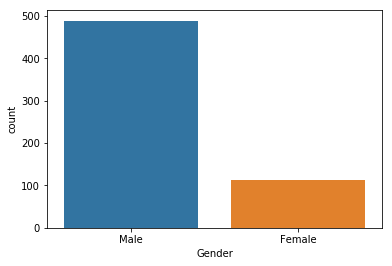

In [21]:
# Analysis of Gender
sns.countplot(x='Gender',data=train_df)

Percentage of male = 81.36439267886855
Percentage of female = 18.63560732113145


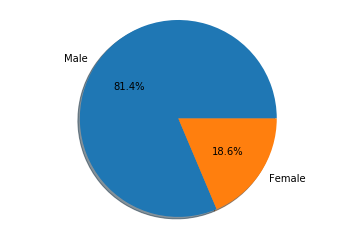

In [22]:
total_male = train_df['Gender'].value_counts()[0]
total_female = train_df['Gender'].value_counts()[1]
percent_male = (total_male/(total_male+total_female))*100
percent_female = (total_female/(total_female+total_male))*100
print('Percentage of male = {}'.format(percent_male))
print('Percentage of female = {}'.format(percent_female))

# Plot Pi plot 
fig1, ax1 = plt.subplots()
ax1.pie([percent_male,percent_female], labels=['Male','Female'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**Observation: - Out of total loan applicants 81.4% are Male and 18.6% are female. It seems that more male candidate aplly for loan**

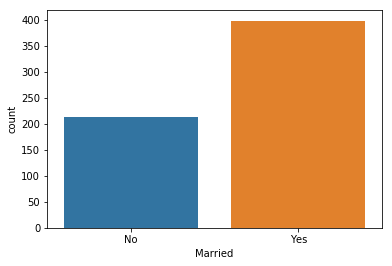

In [23]:
sns.countplot(x='Married',data=train_df)

Percentage of Married = 65.13911620294598
Percentage of Not Married = 34.86088379705401


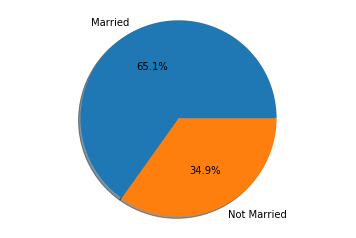

In [24]:
maried = train_df['Married'].value_counts()[0]
not_married = train_df['Married'].value_counts()[1]
percent_married = (maried/(maried+not_married))*100
percent_not_married = (not_married/(maried+not_married))*100
print('Percentage of Married = {}'.format(percent_married))
print('Percentage of Not Married = {}'.format(percent_not_married))

# Plot Pi plot 
fig1, ax1 = plt.subplots()
ax1.pie([percent_married,percent_not_married], labels=['Married','Not Married'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**Observations: - More married people apply for loan than not married**

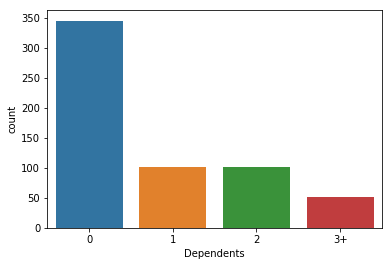

In [26]:
sns.countplot(x='Dependents',data=train_df)

**There are more number of people having dependents 0 and there is less number of people having dependents more than 3**

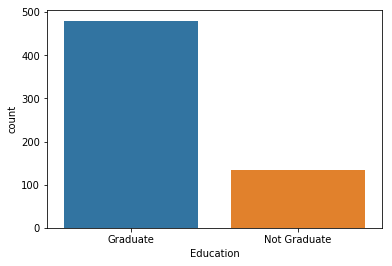

In [27]:
sns.countplot(x = 'Education',data=train_df)

Percentage of educated = 78.17589576547232
Percentage of Not educated = 21.824104234527688


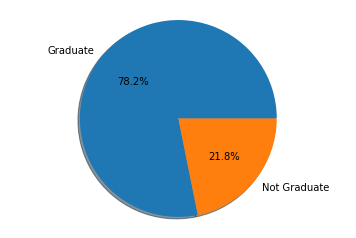

In [28]:
educated = train_df['Education'].value_counts()[0]
not_educated = train_df['Education'].value_counts()[1]
percent_educated = (educated/(educated+not_educated))*100
percent_not_educated = (not_educated/(not_educated+educated))*100
print('Percentage of educated = {}'.format(percent_educated))
print('Percentage of Not educated = {}'.format(percent_not_educated))

# Plot Pi plot 
fig1, ax1 = plt.subplots()
ax1.pie([percent_educated,percent_not_educated], labels=['Graduate','Not Graduate'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**There are more number of Gradute people who applied for loan **

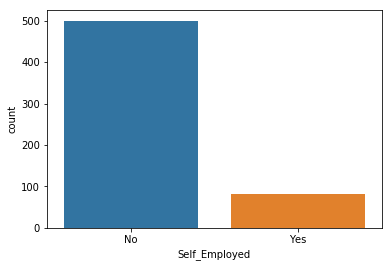

In [29]:
# Self_Employed
sns.countplot(x = 'Self_Employed',data=train_df)

Percentage of self Employed = 85.91065292096219
Percentage of Not self Employed = 14.0893470790378


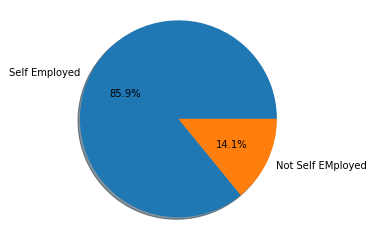

In [30]:
self_Employed = train_df['Self_Employed'].value_counts()[0]
not_Self_Employed = train_df['Self_Employed'].value_counts()[1]
percent_self_Employed = (self_Employed/(self_Employed+not_Self_Employed))*100
percent_not_Self_Employed = (not_Self_Employed/(self_Employed+not_Self_Employed))*100
print('Percentage of self Employed = {}'.format(percent_self_Employed))
print('Percentage of Not self Employed = {}'.format(percent_not_Self_Employed))

# Plot Pi plot 
fig1, ax1 = plt.subplots()
ax1.pie([percent_self_Employed,percent_not_Self_Employed], labels=['Self Employed','Not Self EMployed'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**There are more number of Self Employed people who applied for Loan**

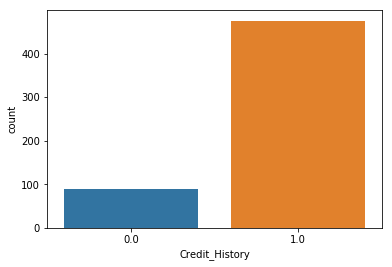

In [31]:
sns.countplot(x='Credit_History',data=train_df)

**There are More number of people having credit history value is 1**

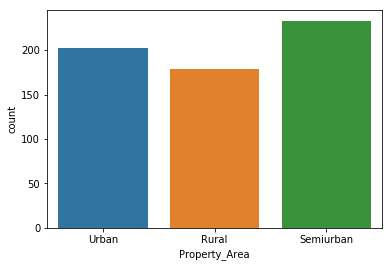

In [32]:
sns.countplot(x='Property_Area',data=train_df)

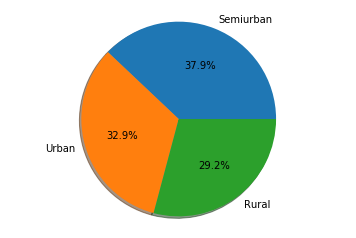

In [33]:
propetry_area = train_df['Property_Area'].value_counts(normalize=True)
# Plot Pi plot 
fig1, ax1 = plt.subplots()
ax1.pie([propetry_area[0],propetry_area[1],propetry_area[2]], labels=['Semiurban','Urban','Rural'], autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**There are more number of applocants who apply for loan belongs to SemiUrban Area. The number of people who belomngs to Urban and rural is approxximately same**

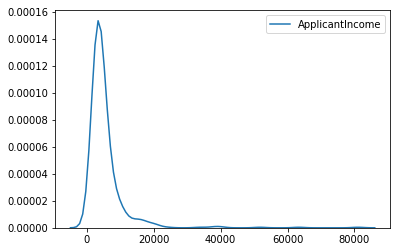

In [34]:
# ApplicantIncome
sns.kdeplot(train_df['ApplicantIncome'])

**There are few people having very heigh income who apply for loan. The distribution of Applicants income is right skewd**

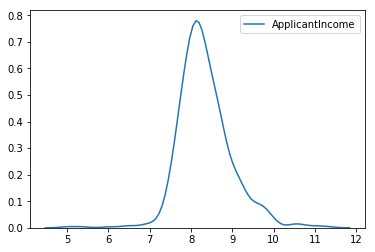

In [35]:
# Take Log of ApplicantIncome 
sns.kdeplot(np.log(train_df['ApplicantIncome'])) # Data look like normal distributation

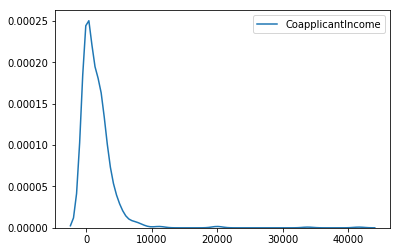

In [36]:
sns.kdeplot(train_df['CoapplicantIncome'])

**There are few co applicatnts having very heigh income**

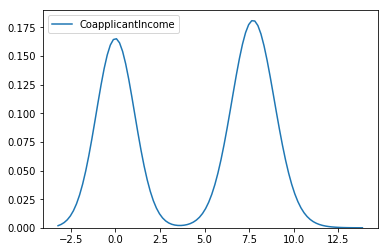

In [37]:
sns.kdeplot(np.log(train_df['CoapplicantIncome']+1)) # Take log of CoapplicantIncome to make distributation normal

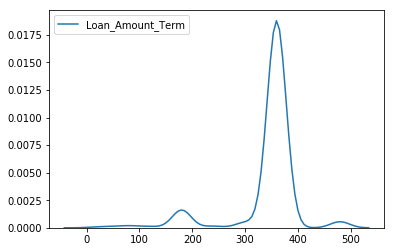

In [38]:
sns.kdeplot(train_df[train_df['Loan_Amount_Term'].notnull()]['Loan_Amount_Term'])

**Loan Amount Term is left skewed and more loan term within 300 to 400**

In [39]:
train_df[train_df['Loan_Amount_Term'].notnull()]['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

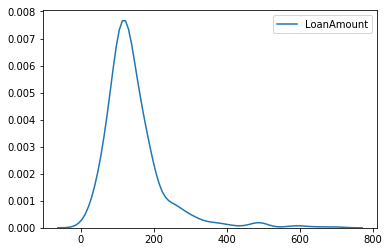

In [40]:
sns.kdeplot(train_df[train_df['LoanAmount'].notnull()]['LoanAmount'])

**Loan amount data is rioght skewed. It seems that there are very few people who are approved for larger amount. More number people apply loan amount in range 0 to 200**

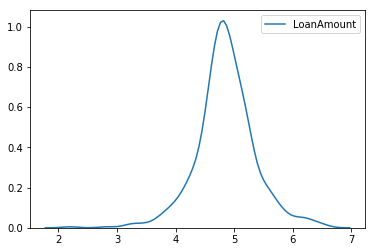

In [41]:
sns.kdeplot(np.log(train_df[train_df['LoanAmount'].notnull()]['LoanAmount']))

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


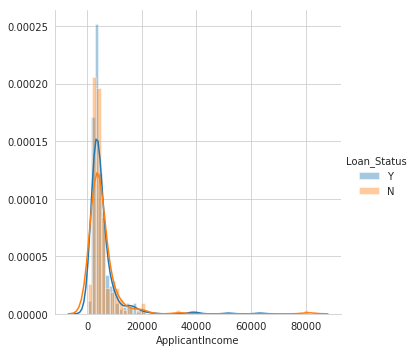

In [42]:
sns.set_style("whitegrid")
sns.FacetGrid(train_df, hue="Loan_Status", size=5) \
   .map(sns.distplot, "ApplicantIncome") \
   .add_legend();
plt.show();

**From The above histogram we are not able to make differentiate the people whose loan status is approved or not on the basis of ApplicantIncome**
Data is Too much Over lapped on loan status

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


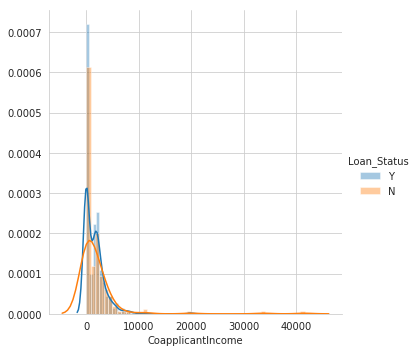

In [43]:
sns.set_style("whitegrid")
sns.FacetGrid(train_df, hue="Loan_Status", size=5) \
   .map(sns.distplot, "CoapplicantIncome") \
   .add_legend();
plt.show();

****From The above histogram we are not able to make differentiate the people whose loan status is approved or not on the basis of CoapplicantIncome**
Data is Too much Over lapped on loan status

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


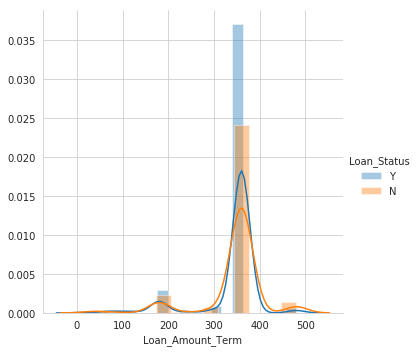

In [44]:
sns.set_style("whitegrid")
sns.FacetGrid(train_df, hue="Loan_Status", size=5) \
   .map(sns.distplot, "Loan_Amount_Term") \
   .add_legend();
plt.show();

**We are not able to make a difference between approved and not approved loan on the basis of Loan_Amount_Term. The data is overlapped**

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


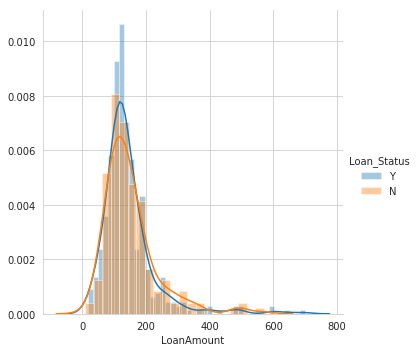

In [45]:
sns.set_style("whitegrid")
sns.FacetGrid(train_df, hue="Loan_Status", size=5) \
   .map(sns.distplot, "LoanAmount") \
   .add_legend();
plt.show();

We are not able to differentiate the approved loan and not approved loan. The data is too much overlapped

**Bivariate Analysis**

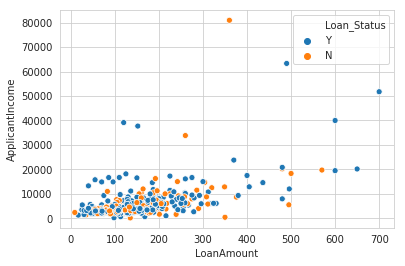

In [46]:
sns.scatterplot(x="LoanAmount", y="ApplicantIncome", data=train_df[train_df.notnull()],hue='Loan_Status')

**There are very few people who apply the loan above 400 so few number of approved loan amount more than 400**

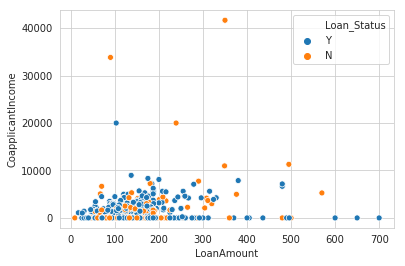

In [47]:
sns.scatterplot(x="LoanAmount", y="CoapplicantIncome", data=train_df[train_df.notnull()],hue='Loan_Status')

***There are few people apply the loan for loan amount greate than 350***

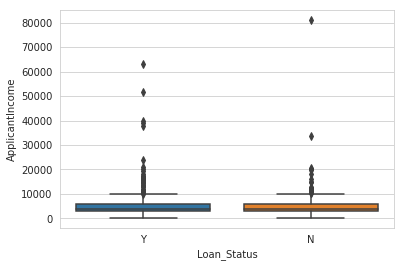

In [48]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_df[train_df.notnull()])

There are more outlier for approved loan.

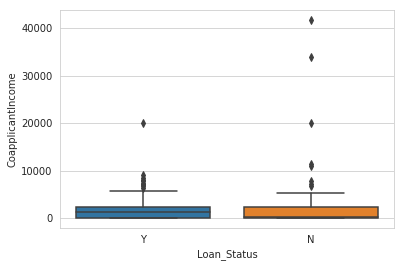

In [49]:

sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train_df[train_df.notnull()])

Threre are more outlier for not approved loan

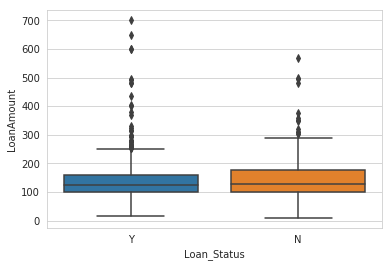

In [50]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=train_df[train_df.notnull()])

There are more outlier in the approved loan.

**Missing Value Imputation**

*Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns having Null value*

In [51]:
train_df[train_df['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [52]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [53]:
# Which Gender has High number of graduate
pd.crosstab(train_df.Gender,train_df.Education)

Education,Graduate,Not Graduate
Gender,,
Female,92,20
Male,376,113


In [54]:
# Which Gender has High number of Married
pd.crosstab(train_df.Gender,train_df.Married)

Married,No,Yes
Gender,,
Female,80,31
Male,130,357


In [55]:
# Fill The missing Value with Male
final_df['Gender'].fillna('Male',inplace=True)

In [56]:
train_df[train_df['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [57]:
pd.crosstab(train_df.Married,train_df.Education)

Education,Graduate,Not Graduate
Married,,
No,168,45
Yes,309,89


In [58]:
pd.crosstab(train_df.Married,train_df.Self_Employed)

Self_Employed,No,Yes
Married,,
No,171,28
Yes,326,54


In [59]:
pd.crosstab(train_df.Married,train_df.Credit_History)

Credit_History,0.0,1.0
Married,,
No,32,167
Yes,57,305


In [60]:

pd.crosstab(train_df.Married,train_df.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


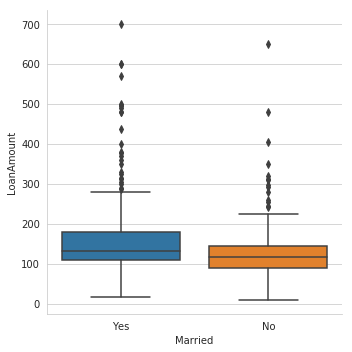

In [61]:
sns.catplot(x='Married',y='LoanAmount',kind='box',data=train_df[train_df['LoanAmount'].notnull()])

In [62]:
train_df.groupby(['Education','Credit_History','Loan_Status','Married']).Self_Employed.count()

Education     Credit_History  Loan_Status  Married
Graduate      0.0             N            No          23
                                           Yes         33
                              Y            No           3
                                           Yes          3
              1.0             N            No          34
                                           Yes         37
                              Y            No          88
                                           Yes        199
Not Graduate  0.0             N            No           6
                                           Yes         19
                              Y            Yes          1
              1.0             N            No           9
                                           Yes         14
                              Y            No          24
                                           Yes         42
Name: Self_Employed, dtype: int64

In [63]:
final_df['Married'].fillna('Yes',inplace=True)

In [64]:
final_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
train_df[train_df['Dependents'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [66]:
train_df[train_df['LoanAmount'].notnull()].groupby(['Gender','Dependents']).LoanAmount.median()

Gender  Dependents
Female  0             111.5
        1             122.0
        2             120.0
        3+            302.5
Male    0             125.0
        1             140.0
        2             134.0
        3+            129.0
Name: LoanAmount, dtype: float64

In [67]:
final_df['Dependents'].fillna('3+',inplace=True)

In [68]:
train_df[train_df['Self_Employed'].notnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [69]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [70]:
final_df['Self_Employed'].fillna('No',inplace= True)

In [71]:
train_df[train_df['LoanAmount'].notnull()].LoanAmount.median()
final_df['LoanAmount'].fillna(128,inplace=True)

In [72]:
train_df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [73]:
final_df['Credit_History'].fillna(1.0,inplace=True)

In [74]:
train_df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [75]:
final_df['Loan_Amount_Term'].fillna(360.0,inplace=True)

**Feature Engineering**

In [76]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               981 non-null object
Married              981 non-null object
Dependents           981 non-null object
Education            981 non-null object
Self_Employed        981 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [77]:
# Total income is sum of applicant and coapplicant income
final_df['Total_income'] = final_df['ApplicantIncome']+final_df['CoapplicantIncome']
# loan to applicant income ratio
final_df['loan_applicant_income'] = (final_df['ApplicantIncome'])/final_df['LoanAmount']
# Loan to coapplicantIncome ratio
final_df['loan_coapplicant_income'] = (final_df['CoapplicantIncome'])/final_df['LoanAmount']
#Loan to total income ratio
final_df['loan_total_income'] = (final_df['Total_income'])/final_df['LoanAmount']

In [78]:
def clean_dependents(data):
    if data == '0':
        return 'zero'
    if data == '1':
        return 'one'
    if data == '2':
        return 'two'
    if data == '3+':
        return 'more_than_three'

In [79]:
final_df['Dependents']  = final_df['Dependents'].apply(lambda x: clean_dependents(x))

In [80]:
def clean_education(data):
    data = data.split()
    data = '_'.join(data)
    return data

In [81]:
final_df['Education']  = final_df['Education'].apply(lambda x: clean_education(x))

In [82]:
final_df['total_income_log'] = np.log(final_df['Total_income'])
final_df['ApplicantIncome_sqrt'] = np.sqrt(final_df['ApplicantIncome'])
final_df['CoapplicantIncome_cbrt'] = np.cbrt(final_df['CoapplicantIncome'])
final_df['LoanAmount_cbrt'] = np.cbrt(final_df['LoanAmount'])

In [83]:
final_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'loan_applicant_income', 'loan_coapplicant_income',
       'loan_total_income', 'total_income_log', 'ApplicantIncome_sqrt',
       'CoapplicantIncome_cbrt', 'LoanAmount_cbrt'],
      dtype='object')

In [84]:
final_train_df = final_df[final_df['Loan_Status'] != 'NA']
final_test_df = final_df[final_df['Loan_Status'] == 'NA']

In [85]:
# Plot Heat map on training data set to check correlated features
corr_matrix_df = final_train_df[['loan_applicant_income','loan_coapplicant_income','loan_total_income','total_income_log',
                       'ApplicantIncome_sqrt','CoapplicantIncome_cbrt','LoanAmount_cbrt','Loan_Amount_Term']]

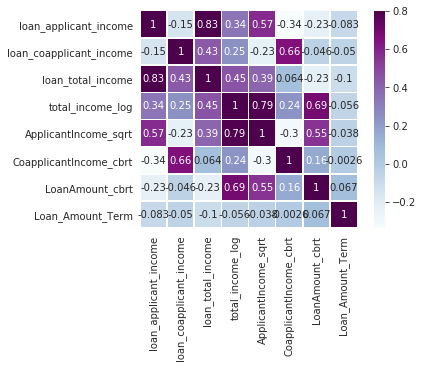

In [86]:
corr_matrix = corr_matrix_df.corr()
sns.heatmap(corr_matrix, vmax=.8, square=True, cmap="BuPu",linewidths=.5,annot=True);

*No features are correlated too much so we don't need to avoid the columns*

In [87]:
def conver_target_to_binary(data):
    if data == 'Y':
        return 1
    else:
        return 0

In [88]:
final_train_df['Loan_Status'] = final_train_df['Loan_Status'].apply(lambda x: conver_target_to_binary(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
# Split data into train and test data set 
X = final_train_df
y = final_train_df['Loan_Status']
from sklearn.model_selection import train_test_split
# SPlit the data set into train test an d validation set
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


**Feature Vectorization**

In [90]:
# Use count vectorise to convert value to one hot encoded 
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
def convert_categorical_to_oneHot(col_name):
    vectorizer = CountVectorizer(vocabulary=X_train[col_name].unique(),lowercase=False,binary=True)
    vectorizer.fit(X_train[col_name].values)
    print(vectorizer.get_feature_names())
    
    # Conver col_name Categorical features into one hot encoding for training data set 
    one_hot_train = vectorizer.transform(X_train[col_name].values)
    print("Shape of matrix after one hot encodig ",one_hot_train.shape)

    # Conver col_name Categorical features into one hot encoding for validation data set 
    one_hot_validation = vectorizer.transform(X_val[col_name].values)
    print("Shape of matrix after one hot encodig ",one_hot_validation.shape)

    # Conver col_name Categorical features into one hot encoding for Test data set 
    one_hot_test = vectorizer.transform(final_test_df[col_name].values)
    print("Shape of matrix after one hot encodig ",one_hot_test.shape)
    
    return (one_hot_train,one_hot_validation,one_hot_test)
    
    

In [92]:
categorical_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']
continuous_columns = ['ApplicantIncome_sqrt','CoapplicantIncome_cbrt','LoanAmount_cbrt','Loan_Amount_Term',
                     'loan_applicant_income','loan_coapplicant_income','loan_total_income','total_income_log',
                     ]

In [93]:
gender_train_one_hot,gender_val_one_hot,gender_test_one_hot = convert_categorical_to_oneHot('Gender')
married_train_one_hot,married_val_one_hot,married_test_one_hot = convert_categorical_to_oneHot('Married')
dependents_train_one_hot,dependents_val_one_hot,dependents_test_one_hot = convert_categorical_to_oneHot('Dependents')
education_train_one_hot,education_val_one_hot,education_test_one_hot = convert_categorical_to_oneHot('Education')
self_employed_train_one_hot,self_employed_val_one_hot,self_employed_test_one_hot = convert_categorical_to_oneHot('Self_Employed')
property_area_train_one_hot,property_area_val_one_hot,property_area_test_one_hot = convert_categorical_to_oneHot('Property_Area')
credit_history_train_one_hot,credit_history_val_one_hot,credit_history_test_one_hot = X_train['Credit_History'].values[:, None],X_val['Credit_History'].values[:, None], final_test_df['Credit_History'].values[:, None]

['Male', 'Female']
Shape of matrix after one hot encodig  (491, 2)
Shape of matrix after one hot encodig  (123, 2)
Shape of matrix after one hot encodig  (367, 2)
['No', 'Yes']
Shape of matrix after one hot encodig  (491, 2)
Shape of matrix after one hot encodig  (123, 2)
Shape of matrix after one hot encodig  (367, 2)
['zero', 'one', 'two', 'more_than_three']
Shape of matrix after one hot encodig  (491, 4)
Shape of matrix after one hot encodig  (123, 4)
Shape of matrix after one hot encodig  (367, 4)
['Graduate', 'Not_Graduate']
Shape of matrix after one hot encodig  (491, 2)
Shape of matrix after one hot encodig  (123, 2)
Shape of matrix after one hot encodig  (367, 2)
['No', 'Yes']
Shape of matrix after one hot encodig  (491, 2)
Shape of matrix after one hot encodig  (123, 2)
Shape of matrix after one hot encodig  (367, 2)
['Urban', 'Semiurban', 'Rural']
Shape of matrix after one hot encodig  (491, 3)
Shape of matrix after one hot encodig  (123, 3)
Shape of matrix after one hot enco

In [94]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
min_max_scaller = MinMaxScaler()
def scale_data_using_standard_scale(colname):
    # finding the mean and standard deviation of data
    min_max_scaller.fit(X_train[colname].values.reshape(-1,1))
    train_data_transform = min_max_scaller.transform(X_train[colname].values.reshape(-1,1))
    validation_data_transform = min_max_scaller.transform(X_val[colname].values.reshape(-1,1))
    test_data_transform = min_max_scaller.transform(final_test_df[colname].values.reshape(-1,1))
    return (train_data_transform,validation_data_transform,test_data_transform)

In [95]:
applicantIncome_sqrt_min_max_train,applicantIncome_sqrt_min_max_val,applicantIncome_sqrt_min_max_test = scale_data_using_standard_scale(
    'ApplicantIncome_sqrt')
coapplicantIncome_cbrt_min_max_train,coapplicantIncome_cbrt_min_max_val,coapplicantIncome_cbrt_min_max_test = scale_data_using_standard_scale(
    'CoapplicantIncome_cbrt')
loanAmount_cbrt_min_max_train,loanAmount_cbrt_min_max_val,loanAmount_cbrt_min_max_test = scale_data_using_standard_scale(
    'LoanAmount_cbrt')
loan_amount_term_min_max_train,loan_amount_term_min_max_val,loan_amount_term_min_max_test = scale_data_using_standard_scale(
    'Loan_Amount_Term')
loan_applicant_income_min_max_train,loan_applicant_income_min_max_val,loan_applicant_income_min_max_test = scale_data_using_standard_scale(
    'loan_applicant_income')
loan_coapplicant_income_min_max_train,loan_coapplicant_income_min_max_val,loan_coapplicant_income_min_max_test = scale_data_using_standard_scale(
    'loan_coapplicant_income')
loan_total_income_min_max_train,loan_total_income_min_max_val,loan_total_income_min_max_test = scale_data_using_standard_scale(
    'loan_total_income')
total_income_log_min_max_train,total_income_log_min_max_val,total_income_log_min_max_test = scale_data_using_standard_scale(
    'total_income_log')

**Model Building **

**Use KNN**

In [121]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.neighbors import KNeighborsClassifier

In [97]:
total_income_log_min_max_train.shape

(491, 1)

In [98]:
X_train_final = hstack((gender_train_one_hot,married_train_one_hot,dependents_train_one_hot,
                       education_train_one_hot,self_employed_train_one_hot,property_area_train_one_hot,
                       credit_history_train_one_hot,applicantIncome_sqrt_min_max_train,
                       coapplicantIncome_cbrt_min_max_train,loanAmount_cbrt_min_max_train,
                       loan_amount_term_min_max_train,loan_applicant_income_min_max_train,
                        loan_coapplicant_income_min_max_train,loan_total_income_min_max_train,
                       total_income_log_min_max_train)).tocsr()
X_validation_final = hstack((gender_val_one_hot,married_val_one_hot,dependents_val_one_hot,
                       education_val_one_hot,self_employed_val_one_hot,property_area_val_one_hot,
                       credit_history_val_one_hot,applicantIncome_sqrt_min_max_val,
                       coapplicantIncome_cbrt_min_max_val,loanAmount_cbrt_min_max_val,
                       loan_amount_term_min_max_val,loan_applicant_income_min_max_val,
                        loan_coapplicant_income_min_max_val,loan_total_income_min_max_val,
                       total_income_log_min_max_val)).tocsr()
X_test_final = hstack((gender_test_one_hot,married_test_one_hot,dependents_test_one_hot,
                       education_test_one_hot,self_employed_test_one_hot,property_area_test_one_hot,
                       credit_history_test_one_hot,applicantIncome_sqrt_min_max_test,
                       coapplicantIncome_cbrt_min_max_test,loanAmount_cbrt_min_max_test,
                       loan_amount_term_min_max_test,loan_applicant_income_min_max_test,
                        loan_coapplicant_income_min_max_test,loan_total_income_min_max_test,
                       total_income_log_min_max_test)).tocsr()

In [99]:
# Predict Data Using Batch
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    y_data_pred_binary = []
    N = 100
    tr_loop = data.shape[0] - data.shape[0]%N
    for i in range(0, tr_loop, N):
        y_data_pred.extend(clf.predict_proba(data[i:i+N])[:,1])
        y_data_pred_binary.extend(clf.predict(data[i:i+N]))
    # we will be predicting for the last data points
    if data.shape[0]%N != 0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
        y_data_pred_binary.extend(clf.predict(data[tr_loop:]))
    
    return (y_data_pred,y_data_pred_binary)

In [100]:
# https://towardsdatascience.com/demystifying-confusion-matrix-confusion-9e82201592fd
#Evaluation of Model - Confusion Matrix Plot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [101]:
from tqdm import tqdm
def hyper_parameter_tuning_kNN(neighbours,data_train,target_train,data_validation,target_validation):
    train_result = []
    test_result = []
    for i in tqdm(neighbours):
        clf = KNeighborsClassifier(n_neighbors=i,n_jobs=-1) # Instantiate KNN
        clf.fit(data_train,target_train) # fit the model
        # Training data
        train_predicted_prob,train_predicted = batch_predict(clf,data_train) # Predict the traing data
        false_postive_rate,true_postive_rate,thresholds = roc_curve(target_train.values,train_predicted_prob) # calculate rates and thresholds
        roc_auc = auc(false_postive_rate, true_postive_rate) # calculate roc score
        train_result.append(roc_auc) # Append the roc score to train results list

        # Testing data
        test_predicted_prob,test_predicted = batch_predict(clf,data_validation) # Predict the test data
        false_postive_rate,true_postive_rate,thresholds = roc_curve(target_validation,test_predicted_prob) # calculate rates and thresholds
        roc_auc = auc(false_postive_rate, true_postive_rate) # calculate roc score
        test_result.append(roc_auc) # Append the roc score to test results list
        print('\nCV accuracy for k = %d is %d%%' % (i, roc_auc*100))
    return (train_result,test_result)
    

In [102]:
# find best k using kfold cross validation in Knn https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6

# Finding best K value
neighbours = range(1,100,2)
train_result,test_result = hyper_parameter_tuning_kNN(neighbours,X_train_final,y_train,X_validation_final,y_val)

  2%|▏         | 1/50 [00:01<01:12,  1.48s/it]


CV accuracy for k = 1 is 69%


  4%|▍         | 2/50 [00:02<01:11,  1.48s/it]


CV accuracy for k = 3 is 72%


  6%|▌         | 3/50 [00:04<01:09,  1.48s/it]


CV accuracy for k = 5 is 71%


  8%|▊         | 4/50 [00:05<01:08,  1.48s/it]


CV accuracy for k = 7 is 75%


 10%|█         | 5/50 [00:07<01:06,  1.48s/it]


CV accuracy for k = 9 is 75%


 12%|█▏        | 6/50 [00:08<01:05,  1.48s/it]


CV accuracy for k = 11 is 77%


 14%|█▍        | 7/50 [00:10<01:03,  1.48s/it]


CV accuracy for k = 13 is 76%


 16%|█▌        | 8/50 [00:11<01:02,  1.48s/it]


CV accuracy for k = 15 is 73%


 18%|█▊        | 9/50 [00:13<01:00,  1.48s/it]


CV accuracy for k = 17 is 74%


 20%|██        | 10/50 [00:14<00:59,  1.48s/it]


CV accuracy for k = 19 is 75%


 22%|██▏       | 11/50 [00:16<00:57,  1.48s/it]


CV accuracy for k = 21 is 76%


 24%|██▍       | 12/50 [00:17<00:56,  1.49s/it]


CV accuracy for k = 23 is 76%


 26%|██▌       | 13/50 [00:19<00:54,  1.49s/it]


CV accuracy for k = 25 is 78%


 28%|██▊       | 14/50 [00:20<00:53,  1.49s/it]


CV accuracy for k = 27 is 82%


 30%|███       | 15/50 [00:22<00:51,  1.49s/it]


CV accuracy for k = 29 is 82%


 32%|███▏      | 16/50 [00:23<00:50,  1.49s/it]


CV accuracy for k = 31 is 82%


 34%|███▍      | 17/50 [00:25<00:49,  1.49s/it]


CV accuracy for k = 33 is 82%


 36%|███▌      | 18/50 [00:26<00:47,  1.49s/it]


CV accuracy for k = 35 is 83%


 38%|███▊      | 19/50 [00:28<00:46,  1.49s/it]


CV accuracy for k = 37 is 83%


 40%|████      | 20/50 [00:29<00:44,  1.49s/it]


CV accuracy for k = 39 is 82%


 42%|████▏     | 21/50 [00:31<00:43,  1.49s/it]


CV accuracy for k = 41 is 80%


 44%|████▍     | 22/50 [00:32<00:41,  1.49s/it]


CV accuracy for k = 43 is 81%


 46%|████▌     | 23/50 [00:34<00:40,  1.49s/it]


CV accuracy for k = 45 is 81%


 48%|████▊     | 24/50 [00:35<00:38,  1.49s/it]


CV accuracy for k = 47 is 81%


 50%|█████     | 25/50 [00:37<00:37,  1.49s/it]


CV accuracy for k = 49 is 81%


 52%|█████▏    | 26/50 [00:38<00:35,  1.49s/it]


CV accuracy for k = 51 is 81%


 54%|█████▍    | 27/50 [00:40<00:34,  1.49s/it]


CV accuracy for k = 53 is 80%


 56%|█████▌    | 28/50 [00:41<00:32,  1.49s/it]


CV accuracy for k = 55 is 80%


 58%|█████▊    | 29/50 [00:43<00:31,  1.49s/it]


CV accuracy for k = 57 is 80%


 60%|██████    | 30/50 [00:44<00:29,  1.49s/it]


CV accuracy for k = 59 is 79%


 62%|██████▏   | 31/50 [00:46<00:28,  1.49s/it]


CV accuracy for k = 61 is 78%


 64%|██████▍   | 32/50 [00:47<00:26,  1.49s/it]


CV accuracy for k = 63 is 77%


 66%|██████▌   | 33/50 [00:49<00:25,  1.50s/it]


CV accuracy for k = 65 is 76%


 68%|██████▊   | 34/50 [00:50<00:23,  1.50s/it]


CV accuracy for k = 67 is 75%


 70%|███████   | 35/50 [00:52<00:22,  1.50s/it]


CV accuracy for k = 69 is 74%


 72%|███████▏  | 36/50 [00:53<00:20,  1.50s/it]


CV accuracy for k = 71 is 73%


 74%|███████▍  | 37/50 [00:55<00:19,  1.50s/it]


CV accuracy for k = 73 is 73%


 76%|███████▌  | 38/50 [00:56<00:17,  1.50s/it]


CV accuracy for k = 75 is 73%


 78%|███████▊  | 39/50 [00:58<00:16,  1.50s/it]


CV accuracy for k = 77 is 72%


 80%|████████  | 40/50 [00:59<00:14,  1.50s/it]


CV accuracy for k = 79 is 72%


 82%|████████▏ | 41/50 [01:01<00:13,  1.50s/it]


CV accuracy for k = 81 is 72%


 84%|████████▍ | 42/50 [01:02<00:11,  1.50s/it]


CV accuracy for k = 83 is 72%


 86%|████████▌ | 43/50 [01:04<00:10,  1.50s/it]


CV accuracy for k = 85 is 72%


 88%|████████▊ | 44/50 [01:05<00:08,  1.50s/it]


CV accuracy for k = 87 is 73%


 90%|█████████ | 45/50 [01:07<00:07,  1.50s/it]


CV accuracy for k = 89 is 73%


 92%|█████████▏| 46/50 [01:08<00:05,  1.50s/it]


CV accuracy for k = 91 is 73%


 94%|█████████▍| 47/50 [01:10<00:04,  1.50s/it]


CV accuracy for k = 93 is 73%


 96%|█████████▌| 48/50 [01:11<00:02,  1.50s/it]


CV accuracy for k = 95 is 73%


 98%|█████████▊| 49/50 [01:13<00:01,  1.50s/it]


CV accuracy for k = 97 is 72%


100%|██████████| 50/50 [01:14<00:00,  1.50s/it]


CV accuracy for k = 99 is 72%


In [103]:
# https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6
from matplotlib.legend_handler import HandlerLine2D
def plot_AUC_with_hyper_parameter(neighbours,train_result,test_result,hyper_parameter_name,is_log_scale=False):
    plt.figure(figsize=(20,10))
    x_scale_data = []
    if is_log_scale:
        for data in neighbours:
            x_scale_data.append(np.log(data))
    else:
        x_scale_data = neighbours
    line1, = plt.plot(x_scale_data, train_result, 'b', label="Train AUC")
    line2, = plt.plot(x_scale_data, test_result, 'r', label="Test AUC")
    
    plt.scatter(x_scale_data, train_result, label='Train AUC points')
    plt.scatter(x_scale_data, test_result, label='CV AUC points')
    plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
    plt.ylabel("Area under ROC curve")
    plt.xlabel("Hyper Parameter "+ hyper_parameter_name)
    plt.show()

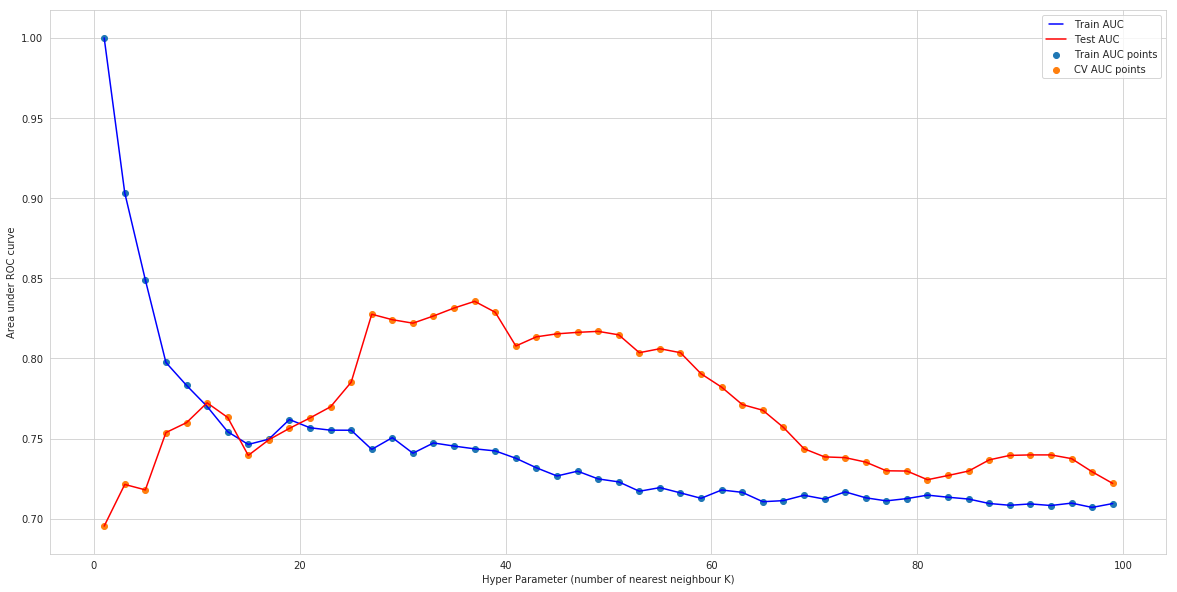

In [104]:
# Show the Area under ROC curve with hyper parameter K
plot_AUC_with_hyper_parameter(neighbours,train_result,test_result,'(number of nearest neighbour K)')

**There is a minimum gap between train and validation set at k = 11 and at this value AUC score is also high **

In [105]:
 # Use best k value to create and fit the model
def createModel(best_k,data_train,target_train):
    clf = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
    clf.fit(data_train,target_train)
    return clf

In [106]:
# PLot the AUC curve for predicted data
def plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,param_name):
    plt.plot(train_false_postive_rate, train_true_postive_rate, label="train AUC ="+str(auc(train_false_postive_rate, 
                                                                                        train_true_postive_rate)))
    plt.plot(test_false_postive_rate, test_true_postive_rate, label="test AUC ="+str(auc(test_false_postive_rate, 
                                                                                     test_true_postive_rate)))
    plt.legend()
    plt.xlabel(param_name+": hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

In [107]:
# Predict the data using model and data
def get_predicted_data(clf,data):
    train_predicted_prob,train_predicted = batch_predict(clf,data)
    return (train_predicted_prob,train_predicted)

In [108]:
# Get positive and negative rate using true and predicted data set
def get_positive_and_false_positive_rate(true_data,predictated_value):
    test_false_postive_rate,test_true_postive_rate,test_thresholds = roc_curve(true_data,predictated_value)
    return (test_false_postive_rate,test_true_postive_rate,test_thresholds)

In [109]:
# Display the Confusion matrix
from sklearn.metrics import confusion_matrix
def show_confusion_matrix(true_val,predicted_val):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(true_val,predicted_val)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['NO','YES'],
                          title='Confusion matrix, without normalization')

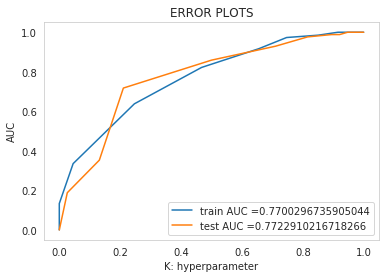

In [110]:
# Create the model using best k  = 80
clf = createModel(11,X_train_final,y_train)

train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final)
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Plot AUC curve
plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,'K')

Confusion matrix, without normalization
[[ 39 115]
 [  9 328]]


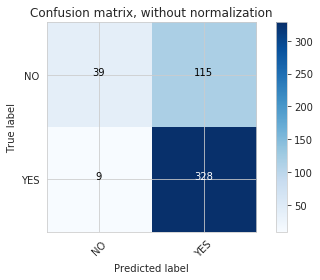

In [111]:
show_confusion_matrix(y_train,train_predicted)# SHow the confusion matrix for training data set

Confusion matrix, without normalization
[[ 7 31]
 [ 2 83]]


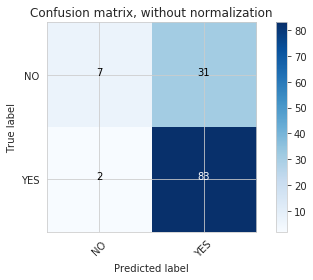

In [112]:
show_confusion_matrix(y_val,test_predicted)# SHow the confusion matrix for test data set 

**Logistic Regression**

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
def hyper_parameter_tuning_logistic_regression(C_param,penalty,data_train,target_train,data_validation,target_validation):
    train_result = []
    test_result = []
    for i in tqdm(C_param_range):
        clf = LogisticRegression(C=i,penalty=penalty)
        clf.fit(data_train,target_train) # fit the model
        # Training data
        train_predicted_prob,train_predicted = batch_predict(clf,data_train) # Predict the traing data
        false_postive_rate,true_postive_rate,thresholds = roc_curve(target_train.values,train_predicted_prob) # calculate rates and thresholds
        roc_auc = auc(false_postive_rate, true_postive_rate) # calculate roc score
        train_result.append(roc_auc) # Append the roc score to train results list

        # Testing data
        test_predicted_prob,test_predicted = batch_predict(clf,data_validation) # Predict the test data
        false_postive_rate,true_postive_rate,thresholds = roc_curve(target_validation,test_predicted_prob) # calculate rates and thresholds
        roc_auc = auc(false_postive_rate, true_postive_rate) # calculate roc score
        test_result.append(roc_auc) # Append the roc score to test results list
        print('\nCV accuracy for C = %d is %d%%' % (i, roc_auc*100))
    return (train_result,test_result)

In [115]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
penalty = 'l1'
train_result,test_result = hyper_parameter_tuning_logistic_regression(C_param_range,penalty,X_train_final,y_train,X_validation_final,y_val)

  0%|          | 0/7 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
100%|██████████| 7/7 [00:00<00:00, 35.66it/s]


CV accuracy for C = 0 is 50%

CV accuracy for C = 0 is 77%

CV accuracy for C = 0 is 85%

CV accuracy for C = 1 is 85%

CV accuracy for C = 10 is 87%

CV accuracy for C = 100 is 87%

CV accuracy for C = 1000 is 87%


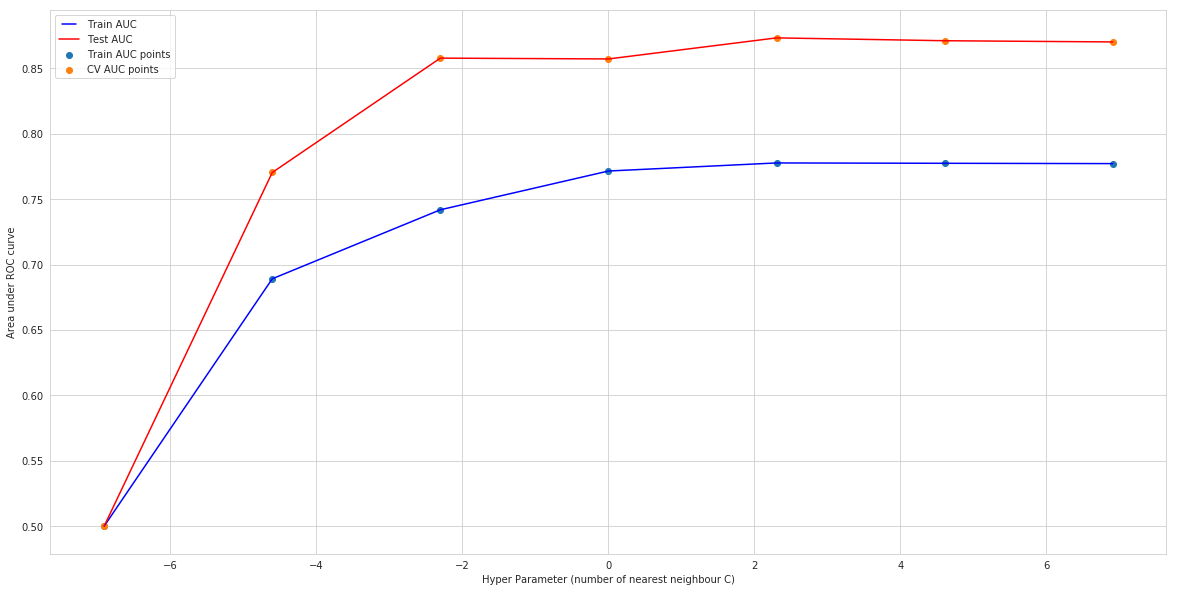

In [116]:
# Show the Area under ROC curve with hyper parameter K
plot_AUC_with_hyper_parameter(C_param_range,train_result,test_result,'(number of nearest neighbour C)',is_log_scale=True)

In [117]:
def create_logistic_model(c,penalty,data_train,target_train):
    clf = LogisticRegression(C=c,penalty=penalty)
    clf.fit(data_train,target_train)
    return clf

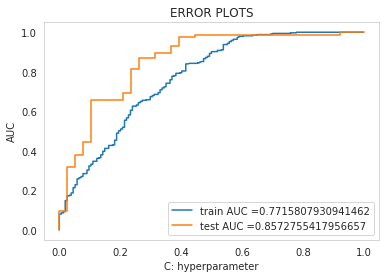

AUC: 0.857


In [122]:
# Create the model using best C  = 10 and penalty is l1
clf = create_logistic_model(1,'l1',X_train_final,y_train)

train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final)
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Plot AUC curve
plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,param_name='C')
# Calculate AUC Score
auc = roc_auc_score(y_val, test_predicted_prob)
print('AUC: %.3f' % auc)

Confusion matrix, without normalization
[[ 61  93]
 [  6 331]]


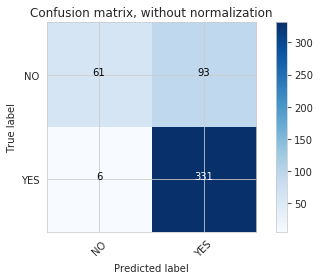

In [123]:
show_confusion_matrix(y_train,train_predicted)# SHow the confusion matrix for training data set

In [ ]:
show_confusion_matrix(y_val,test_predicted)# SHow the confusion matrix for test data set 

In [126]:
from sklearn.metrics import roc_curve, auc,roc_auc_score

In [127]:
C_param_range = [0.001,0.01,0.1,1,10,100,1000]
penalty = 'l2'
train_result,test_result = hyper_parameter_tuning_logistic_regression(C_param_range,penalty,X_train_final,y_train,X_validation_final,y_val)

100%|██████████| 7/7 [00:00<00:00, 86.41it/s]


CV accuracy for C = 0 is 77%

CV accuracy for C = 0 is 84%

CV accuracy for C = 0 is 86%

CV accuracy for C = 1 is 86%

CV accuracy for C = 10 is 86%

CV accuracy for C = 100 is 87%

CV accuracy for C = 1000 is 87%


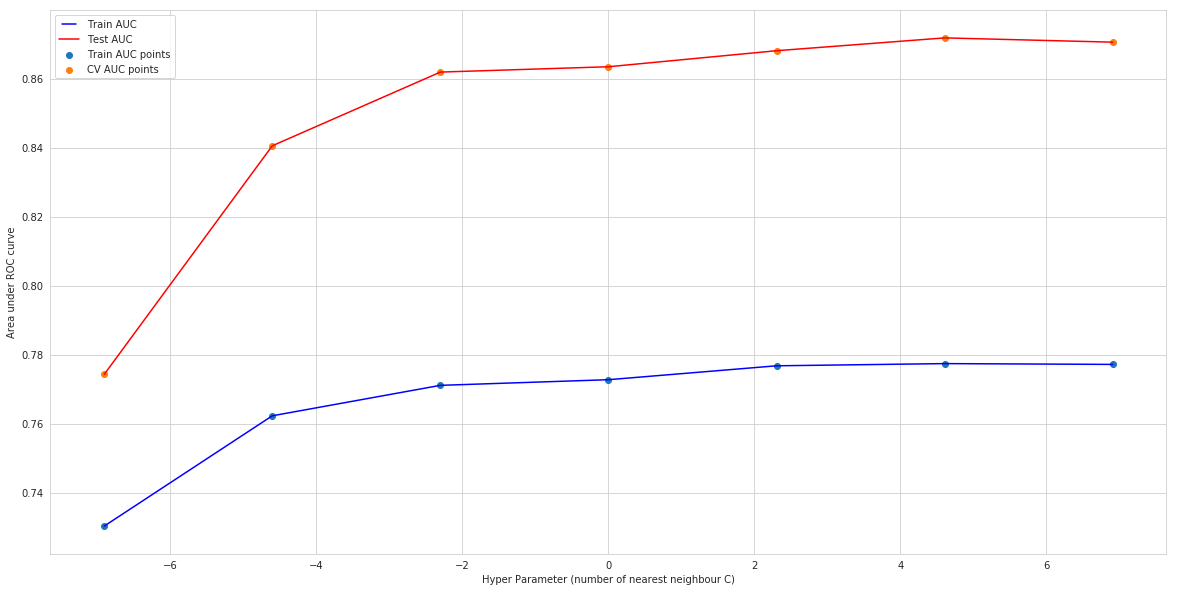

In [128]:
# Show the Area under ROC curve with hyper parameter K
plot_AUC_with_hyper_parameter(C_param_range,train_result,test_result,'(number of nearest neighbour C)',is_log_scale=True)

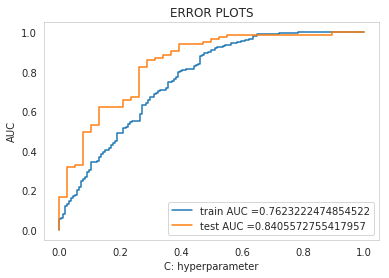

AUC: 0.841


In [129]:
# Create the model using best C  = 10 and penalty is l2
clf = create_logistic_model(0.01,'l2',X_train_final,y_train)

train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final)
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Plot AUC curve
plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,param_name='C')
# Calculate AUC Score
auc = roc_auc_score(y_val, test_predicted_prob)
print('AUC: %.3f' % auc)

**Use Random Forest Model **

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

<p> We use following Hyperparameter of Random Forest to tune it</p></br>
<ul>
    <li>n_estimators = number of trees in the foreset</li>
    <li>max_features = max number of features considered for splitting a node</li>
    <li>max_depth = max number of levels in each decision tree</li>
    <li>min_samples_split = min number of data points placed in a node before the node is split</li>
     <li>min_samples_leaf = min number of data points allowed in a leaf node</li>
      <li>min_samples_leaf = min number of data points allowed in a leaf node</li>
    <li>bootstrap = method for sampling data points (with or without replacement)</li>
</ul>

In [139]:
#Hyper parameter Tuning of Random Forest
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 30)]
# Number of features to be considered at the time splitting at every node
max_features = ['auto', 'sqrt']
# Maximum NUmber of depth of tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [141]:
rf_model = RandomForestClassifier()
random_search_clf = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid,
                                      n_iter=100,cv = 5, verbose=2, random_state=42,
                                       scoring='roc_auc')
random_search_clf.fit(X_train_final,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=101, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=20, bootstrap=False, total=   0.2s
[CV] n_estimators=153, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=153

[CV]  n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1

[CV]  n_estimators=106, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.2s
[CV] n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=112, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=112, min_

[CV]  n_estimators=55, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.1s
[CV] n_estimators=55, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=55, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, total=   0.1s
[CV] n_estimators=106, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=106, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   0.2s
[CV] n_estimators=106, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=106, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True, total=   0.2s
[CV] n_estimators=106, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=106, min_sam

[CV]  n_estimators=81, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=81, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=81, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=81, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=81, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.1s
[CV] n_estimators=184, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=184, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False, total=   0.4s
[CV] n_estimators=184, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=184, min_

[CV]  n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True 
[CV]  n_estimators=137, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=137, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=137, min_sample

[CV]  n_estimators=96, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.2s
[CV] n_estimators=96, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=96, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.2s
[CV] n_estimators=96, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=96, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   0.2s
[CV] n_estimators=174, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=174, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False, total=   0.3s
[CV] n_estimators=174, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=174, min_samples

[CV]  n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   0.3s
[CV] n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   0.3s
[CV] n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   0.3s
[CV] n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=143, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   0.3s
[CV] n_estimators=101, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=101, min_

[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.1s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.1s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.1s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=65, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   0.1s
[CV] n_estimators=65, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=65, min_s

[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   0.3s
[CV] n_estimators=179, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=1

[CV]  n_estimators=184, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=False, total=   0.4s
[CV] n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False, total=   0.2s
[CV] n_estimators=81, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=False 
[CV]  n_estimators=81, min_samples

[CV]  n_estimators=117, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=117, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=117, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   0.2s
[CV] n_estimators=55, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=55, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=55, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=55, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True, total=   0.1s
[CV] n_estimators=55, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=55, min_samples_split=

[CV]  n_estimators=65, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=65, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=65, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   0.1s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.1s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=75, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.1s
[CV] n_estimators=75, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=75, min_samples_s

[CV]  n_estimators=168, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=168, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=168, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=168, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=168, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=   0.3s
[CV] n_estimators=96, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=96, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False, total=   0.2s
[CV] n_estimators=96, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.1s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.1s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.1s
[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   0.1s
[CV] n_estimators=168, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False 
[CV]  n_estimators=168, min_

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [143]:
print(random_search_clf.best_params_) # Print Best Param for roc score

{'n_estimators': 65, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


In [144]:
print(random_search_clf.best_score_)

0.7723899083788576


In [145]:
# Create RandomForest Model
def create_RF_Model(data_train,target_train,param):
    clf = RandomForestClassifier(n_estimators=param['n_estimators'],
                                min_samples_split=param['min_samples_split'],
                                min_samples_leaf=param['min_samples_leaf'],
                                max_features=param['max_features'],
                                max_depth= param['max_depth'],
                                bootstrap=True)
    clf.fit(data_train,target_train)
    return clf

In [146]:
# Create the model using best param
clf = create_RF_Model(X_train_final,y_train,random_search_clf.best_params_)

train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final)
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Calculate AUC Score
auc = roc_auc_score(y_val, test_predicted_prob)
print('AUC: %.3f' % auc)

AUC: 0.862


**Use Naive Bayes(Gaussian)**

In [147]:
from sklearn.naive_bayes import GaussianNB

In [154]:
# Create Model
clf = GaussianNB()
clf.class_prior_ = [0.31,0.69]
clf.fit(X_train_final.todense(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [156]:
train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final.todense()) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final.todense())
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Calculate AUC Score
auc = roc_auc_score(y_val, test_predicted_prob)
print('AUC: %.3f' % auc)

AUC: 0.841


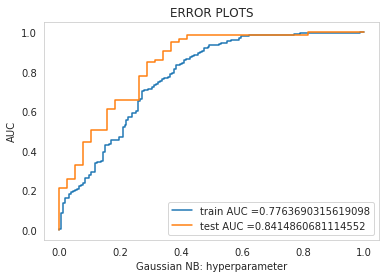

In [159]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
# Plot AUC curve
plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,param_name='Gaussian NB')

**Use Gradient Boost Classifier**

In [164]:
# Hyper Parameter for Gradient Boost Classifer
# Learning rate
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,X_train_final.shape[1]))

params = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'max_depth': max_depths,
               'min_samples_split': min_samples_splits,
               'min_samples_leaf': min_samples_leafs,
               'max_features': max_features}

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gr_model = GradientBoostingClassifier()
random_search_clf = RandomizedSearchCV(estimator=gr_model,param_distributions=params,
                                      n_iter=100,cv = 5, verbose=2, random_state=42,
                                       scoring='roc_auc')
random_search_clf.fit(X_train_final,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1, total=   0.4s
[CV] n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1, total=   0.3s
[CV] n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.1, min_samples_leaf=0.1, max_features=19, max_depth=12.0, learning_rate=1, total=   0.3s
[CV] n_estimators=100, min_samples_split=0.30000000000000004, min_samples_leaf=0.30000000000000004, max_features=2

[CV]  n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=15, max_depth=11.0, learning_rate=0.1, total=   

[CV]  n_estimators=8, min_samples_split=0.8, min_samples_leaf=0.2, max_features=5, max_depth=25.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.8, min_samples_leaf=0.2, max_features=22, max_depth=17.0, learning_rate=1 
[CV]  n_es

[CV]  n_estimators=100, min_samples_split=0.7000000000000001, min_samples_leaf=0.2, max_features=2, max_depth=13.0, learning_rate=0.25, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.7000000000000001, min_samples_leaf=0.2, max_features=2, max_depth=13.0, learning_rate=0.25 
[CV]  n_estimators=100, min_samples_split=0.7000000000000001, min_samples_leaf=0.2, max_features=2, max_depth=13.0, learning_rate=0.25, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.30000000000000004, min_samples_leaf=0.30000000000000004, max_features=10, max_depth=5.0, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=0.30000000000000004, min_samples_leaf=0.30000000000000004, max_features=10, max_depth=5.0, learning_rate=0.05, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.30000000000000004, min_samples_leaf=0.30000000000000004, max_features=10, max_depth=5.0, learning_rate=0.05 
[CV]  n_estimators=100, min_samples_split=0.30000000000000004, min_samples_leaf=0.300000000000

[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate=1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.4, max_features=23, max_depth=10.0, learning_rate

[CV]  n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.6, min_samples_leaf=0.30000000000000004, max_features=23, max_depth=15.0, learning_rate=0.5, to

[CV]  n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.2, max_features=18, max_depth=20.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.2, max_features=18, max_depth=20.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.2, max_features=18, max_depth=20.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.2, max_features=18, max_depth=20.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.2, max_features=18, max_depth=20.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=100, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=7, max_depth=32.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=7, max_depth=32.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.7000000000000001, min_samples

[CV]  n_estimators=100, min_samples_split=0.1, min_samples_leaf=0.1, max_features=21, max_depth=18.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1 
[CV]  n_estimators=1, min_samples_split=0.7000000000000001, min_samples_leaf=0.1, max_features=5, max_depth=9.0, learning_rate=1, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.70000

[CV]  n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.1, max_features=17, max_depth=22.0, learning_rate=0.5, total=   0.2s
[CV] n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.1, max_features=17, max_depth=22.0, learning_rate=0.5 
[CV]  n_estimators=200, min_samples_split=1.0, min_samples_leaf=0.1, max_features=17, max_depth=22.0, learning_rate=0.5, total=   0.2s
[CV] n_estimators=64, min_samples_split=0.30000000000000004, min_samples_leaf=0.1, max_features=13, max_depth=29.0, learning_rate=0.01 
[CV]  n_estimators=64, min_samples_split=0.30000000000000004, min_samples_leaf=0.1, max_features=13, max_depth=29.0, learning_rate=0.01, total=   0.1s
[CV] n_estimators=64, min_samples_split=0.30000000000000004, min_samples_leaf=0.1, max_features=13, max_depth=29.0, learning_rate=0.01 
[CV]  n_estimators=64, min_samples_split=0.30000000000000004, min_samples_leaf=0.1, max_features=13, max_depth=29.0, learning_rate=0.01, total=   0.1s
[CV] n_estimators=64, min_samples_sp

[CV]  n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5 
[CV]  n_estimators=100, min_samples_split=0.4, min_samples_leaf=0.4, max_features=17, max_depth=14.0, learning_rate=0.5, total=   0.1s
[CV] n_estimators=32, min_samples_split=0.9, min_samples_leaf=0.30000000000000004, max_features=18, 

[CV]  n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25 
[CV]  n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25 
[CV]  n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25 
[CV]  n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.6, min_samples_leaf=0.5, max_features=11, max_depth=4.0, learning

[CV]  n_estimators=200, min_samples_split=0.8, min_samples_leaf=0.1, max_features=16, max_depth=30.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.8, min_samples_leaf=0.1, max_features=16, max_depth=30.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=0.8, min_samples_leaf=0.1, max_features=16, max_depth=30.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.8, min_samples_leaf=0.1, max_features=16, max_depth=30.0, learning_rate=0.1 
[CV]  n_estimators=200, min_samples_split=0.8, min_samples_leaf=0.1, max_features=16, max_depth=30.0, learning_rate=0.1, total=   0.2s
[CV] n_estimators=1, min_samples_split=0.5, min_samples_leaf=0.4, max_features=14, max_depth=24.0, learning_rate=0.25 
[CV]  n_estimators=1, min_samples_split=0.5, min_samples_leaf=0.4, max_features=14, max_depth=24.0, learning_rate=0.25, total=   0.0s
[CV] n_estimators=1, min_samples_split=0.5, min_samples_leaf=0.4, max_features=14, max_depth=24.0, lea

[CV]  n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1 
[CV]  n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1 
[CV]  n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1, total=   0.0s
[CV] n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1 
[CV]  n_estimators=64, min_samples_split=0.7000000000000001, min_samples_leaf=0.4, max_features=7, max_depth=11.0, learning_rate=1, total=   0.0s
[CV] n_estimators=64, m

[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05, total=   0.2s
[CV] n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05 
[CV]  n_estimators=200, min_samples_split=0.4, min_samples_leaf=0.30000000000000004, max_features=18, max_depth=4.0, learning_rate=0.05, to

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   28.0s finished
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [172]:
print(random_search_clf.best_params_) # Print Best Param for roc score

{'n_estimators': 64, 'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_features': 10, 'max_depth': 17.0, 'learning_rate': 0.01}


In [171]:
def create_Gradient_boost_classifier(data_train,target_train,params):
    clf = GradientBoostingClassifier(learning_rate=params['learning_rate'],
                                    n_estimators=params['n_estimators'],
                                    max_depth=params['max_depth'],
                                    min_samples_split=params['min_samples_split'],
                                    min_samples_leaf=params['min_samples_leaf'],
                                    max_features=params['max_features'])
    clf.fit(data_train,target_train)
    return clf

In [173]:
# Create the model using best param
clf = create_Gradient_boost_classifier(X_train_final,y_train,random_search_clf.best_params_)

train_predicted_prob,train_predicted = get_predicted_data(clf,X_train_final) # Predict the value using training data set
# Calculate false negative and positive rates for AUC
train_false_postive_rate,train_true_postive_rate,train_thresholds = get_positive_and_false_positive_rate(y_train,
                                                                                                         train_predicted_prob)

# Calculate rates of test data set
test_predicted_prob,test_predicted = get_predicted_data(clf,X_validation_final)
test_false_postive_rate,test_true_postive_rate,test_thresholds = get_positive_and_false_positive_rate(y_val,
                                                                                                      test_predicted_prob)
# Calculate AUC Score
auc = roc_auc_score(y_val, test_predicted_prob)
print('AUC: %.3f' % auc)

AUC: 0.845


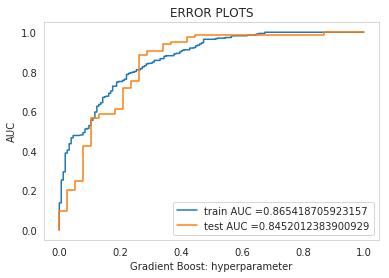

In [174]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
# Plot AUC curve
plotAUC(train_false_postive_rate,train_true_postive_rate,test_false_postive_rate,test_true_postive_rate,param_name='Gradient Boost')

In [178]:
from prettytable import PrettyTable
summary_table = PrettyTable()

summary_table.field_names = ["Model", "Roc Score Train data","Roc on Test Data"]
summary_table.add_row(['KNeighborsClassifier','0.7700','0.7702'])
summary_table.add_row(['LogisticRegression(l1,c=1)','0.7715','8572'])
summary_table.add_row(['LogisticRegression(l2,0.1)','0.7603','0.8504'])
summary_table.add_row(['RandomForestClassifier','0.8525','0.8634'])
summary_table.add_row(['GaussianNB','.7763','0.8414'])
summary_table.add_row(['GradientBoostingClassifier','.0.8654','0.8452'])
# for data in final_test_results:
#     summary_table.add_row(data)
print(summary_table)

+----------------------------+----------------------+------------------+
|           Model            | Roc Score Train data | Roc on Test Data |
+----------------------------+----------------------+------------------+
|    KNeighborsClassifier    |        0.7700        |      0.7702      |
| LogisticRegression(l1,c=1) |        0.7715        |       8572       |
| LogisticRegression(l2,0.1) |        0.7603        |      0.8504      |
|   RandomForestClassifier   |        0.8525        |      0.8634      |
|         GaussianNB         |        .7763         |      0.8414      |
| GradientBoostingClassifier |       .0.8654        |      0.8452      |
+----------------------------+----------------------+------------------+


**Random Forest Classifier Is good**